In [1]:
# importing required liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading dataset
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
# to cjeck total no. of rows ans columns
data.shape

(8124, 23)

In [4]:
# using isnull fuction to chk whether there is any missing value or not
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
# need to chk data dtype 
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

EDA

UNIVARIATE ANALYSIS

<AxesSubplot:xlabel='class', ylabel='count'>

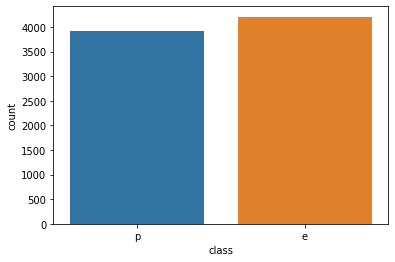

In [7]:
sns.countplot(data['class'])

In [ ]:
# AS I CAN SEE THAT THE COUNT OF  EDIBLE MUSHROOMS ARE HIGHER THAN THE POISONOUS ONE

In [8]:
# to check the exact no.s of e(EDIBLE MUSHROOMS) and p(POISONOUS MUSHROOMS)
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<Figure size 1008x432 with 0 Axes>

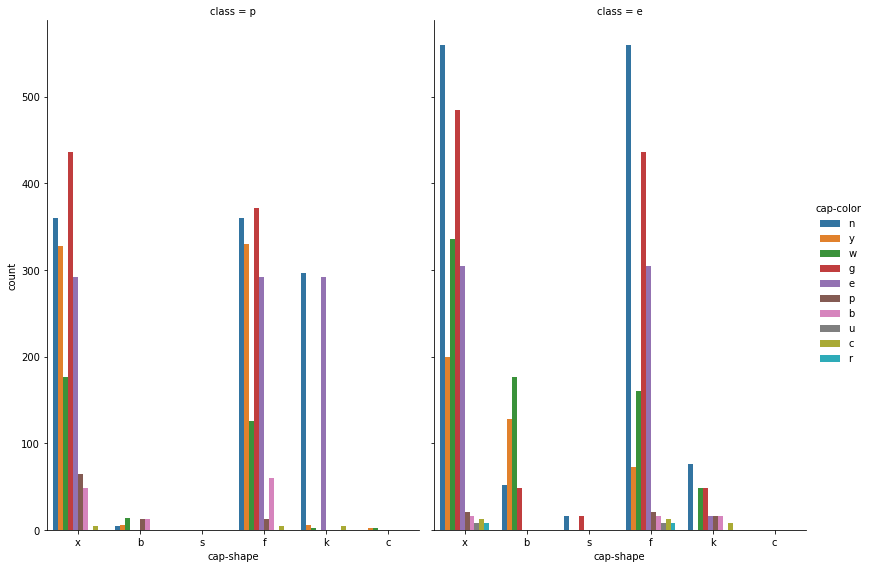

In [20]:

plt.figure(figsize=[14,6])
g=sns.catplot(x='cap-shape',hue='cap-color',col='class',data=data,kind='count',height=8,aspect=.7);

"n" is highly  EDIBLE MUSHROOMS
"e" is highly  POISONOUS MUSHROOMS

<Figure size 1008x432 with 0 Axes>

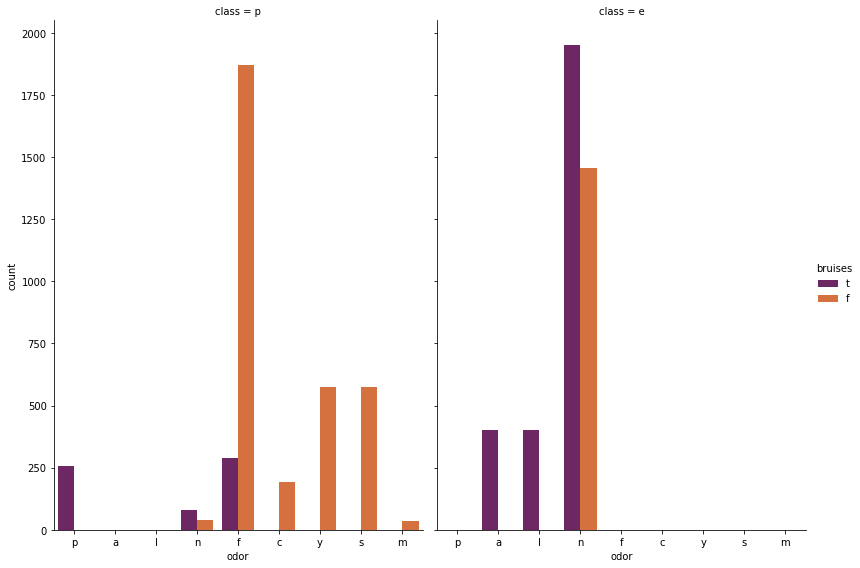

In [21]:
plt.figure(figsize=(14,6))
g = sns.catplot(x='odor',hue='bruises',col='class',data=data,kind='count',height=8,aspect=.7,palette='inferno');

AS I CAN SEE "f" IN CLASS P IS GREATER THAN CLASS E SO WE CAN SAY THAT THIS "f" is hihgly POISONOUS MUSHROOMS and NOT ADVISABLE TO EAT 
ON THE OTHER HAND " t" IS ADVISABLE TO EAT. 

DATA PREPROCESSING

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = data.apply(LabelEncoder().fit_transform)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [23]:
# Now Segregating independent and dependent variables in form of x and y

x = data.drop('class',axis=1)
y = data['class']

In [24]:
# splitting data arrays into two subsets: for training data and for testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=0) # in this i have trained 70 % of my data and 30% for testing

In [25]:
# Now we have to do Scalling so that it will normalize the data within a particular range eg. in between 0 to 1
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

In [30]:
# now i have to import required Algorithms to build model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report # to evaluate classification Model

In [36]:
# Now i have to import Best metrics to evaluate classification Model to chk how well the classification Model fits the observed data

#LOGISTIC REGRESSION
log = LogisticRegression()
log.fit(x_train,y_train)
log_pd = log.predict(x_test)
accuracy_score(log_pd,y_test)

0.9474979491386383

In [39]:
# DECISION TREE
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pd = dtc.predict(x_test)
accuracy_score(dtc_pd,y_test)

1.0

In [40]:
# Random Forest
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pd = rfc.predict(x_test)
accuracy_score(rfc_pd,y_test)

1.0

In [41]:
# SUPPORT VECTOR MACHINE
svc = SVC()
svc.fit(x_train,y_train)
svc_pd = svc.predict(x_test)
accuracy_score(svc_pd,y_test)

1.0

In [42]:
# Now i have to chk the cross_val_score() function that is  used to perform the evaluation
from sklearn.model_selection import cross_val_score

In [43]:
# for Logistic Regression
print(cross_val_score(log,x,y,cv=5).mean())

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8392256915498295


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
# for decision Tree
print(cross_val_score(dtc,x,y,cv=5).mean())

0.9078966275104206


In [46]:
# for Random Forest
print(cross_val_score(rfc,x,y,cv=5).mean())

0.8957090564607807


In [48]:
# for Support vector machine
print(cross_val_score(svc,x,y,cv=5).mean())

0.841292231906025


Accuracy score

Logistic Regression = 0.9474979491386383
Decision Tree       = 1.0
Random Forest       = 1.0
Support vector      = 1.0

cross_val_score

Logistic Regression = 0.8392256915498295
Decision Tree       = 0.9078966275104206
Random Forest       = 0.8957090564607807
Support vector      = 0.841292231906025

                      Accuracy score     cross_val_score        Diff
Logistic Regression      0.947497949         0.839225692          0.108272258
Decision Tree                 1.0            0.907896628          0.092103372
Random Forest                 1.0            0.895709056          0.104290944
Support vector                1.0            0.841292232          0.158707768

AS I CAN SEE THE DECISION TREE HAS THE MINIMUM DIFFERENCE HENCE I WILL GO WITH  DECISION TREE

In [49]:
# Now i will use Hypertuning method to tune the model 

from sklearn.model_selection import GridSearchCV
# taking required parameters to tune the model
parameter = {'max_depth':np.arange(2,10),
             'criterion':['gini', 'entropy'],
             'splitter':['best','random'],
             'max_features':['auto','sqrt','log2']}

In [50]:
grid = GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [51]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [52]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [53]:
final_mod = DecisionTreeClassifier(criterion='gini',max_depth=9,max_features='sqrt',splitter='random')

In [54]:
final_mod.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, max_features='sqrt', splitter='random')

In [55]:
final_mod_pd = final_mod.predict(x_test)
accuracy_score(final_mod_pd,y_test)

0.9942575881870386

In [58]:
import joblib
joblib.dump(final_mod,"Final_modle.pkl")

['Final_modle.pkl']